# 데이터 전처리

- 날짜데이터 처리
- 파생변수 생성 / 결측값 처리
- 데이터 재구조화 / 병합

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('01_Data.csv')
df1.head(3)

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행


In [7]:
# 날짜 데이터 변환
df1['Datetime_dt'] =pd.to_datetime(df1['Datetime'])
#Datetime 데이터를 날짜형식의 데이터로 변환하여,
#df1 데이터 프레임에 새로운 Datetime_dt 변수로 선언

In [8]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank,Datetime_dt
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고,2019-05-06
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드,2020-02-20
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행,2019-02-28
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합,2019-05-13
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합,2019-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행,2019-03-01
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고,2019-04-01
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드,2019-04-01
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드,2020-02-06


In [13]:
df1['Year'] = df1['Datetime_dt'].dt.year #날짜형식의 데이터에서 연도 추출
df1['Month'] = df1['Datetime_dt'].dt.month #월 추출
df1['Day'] = df1['Datetime_dt'].dt.day #일 추출
df1['Day_of_week'] = df1['Datetime_dt'].dt.day_name() # 요일 추출
df1['Week'] = df1['Datetime_dt'].dt.isocalendar().week #주차 추출

In [16]:
df1.pivot_table(index='Product_Type',values='Amount_Month',columns='Year',aggfunc='sum').to_excel('result_year.xlsx')

In [18]:
#파생 변수 생성
#월랜탈비용('Amount_Month')과 계약기간('Term')을 곱하여 총계약금액('Total_Amount')을 계산
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']

In [19]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Gender,Credit_Rank,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,여자,9.0,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,남자,2.0,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,여자,8.0,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,남자,5.0,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,남자,8.0,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,남자,NaN,기업은행,2019-03-01,2019,3,1,Friday,9,5814000
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,여자,8.0,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,여자,1.0,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,여자,2.0,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000


In [26]:
#비교구문과 loc함수를 활용하여 데이터를 그룹화
cond1 = (df1['Age'] >=70)
cond2 = (df1['Age'] >=60)
df1.loc[cond1, '연령대'] = '70대 이상'
df1.loc[cond2, '연령대'] = '60대 이상'

In [27]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Credit_Rank,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,9.0,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,NaN
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,2.0,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,NaN
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,8.0,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,NaN
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,5.0,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,NaN
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,8.0,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,NaN,기업은행,2019-03-01,2019,3,1,Friday,9,5814000,NaN
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,8.0,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,NaN
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,1.0,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대 이상
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,2.0,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,NaN


In [28]:
df1['연령대'].value_counts()

연령대
60대 이상    8319
Name: count, dtype: int64

In [33]:
#apply() : 파이썬 함수를 활용해 데이터를 처리
def func1(x):
    if x >= 70:
        return '70대 이상'
    elif x >= 60:
        return '60대 이상'
    elif x >= 50:
        return '50대 이상'
    else:
        return '40대 이하'

df1['Age'].apply(func1)

0        40대 이하
1        40대 이하
2        40대 이하
3        40대 이하
4        60대 이상
          ...  
51296    40대 이하
51297    40대 이하
51298    60대 이상
51299    50대 이상
51300    50대 이상
Name: Age, Length: 51301, dtype: object

In [35]:
def func2(x):
    return str(x)+ '0대'

df1['Age'].apply(func2)

0        42.00대
1        39.00대
2        48.00대
3        39.00대
4        60.00대
          ...  
51296    47.00대
51297    42.00대
51298    65.00대
51299    54.00대
51300    53.00대
Name: Age, Length: 51301, dtype: object

In [37]:
#특정 문자열에서 특정 위치의 글자를 찾을 때
str1 = 'Python'
str1[0]

'P'

In [40]:
def func2(x):
    return str(x)[0]+ '0대'

df1['연령대'] = df1['Age'].apply(func2)

In [42]:
df1['연령대'].value_counts()

연령대
40대    16283
50대    12522
n0대     6972
30대     6798
60대     5947
70대     1737
80대      576
20대      407
90대       57
10대        2
Name: count, dtype: int64

- 결측값( Missing Value -> NaN(Not A Number)) 확인 및 처리

- 결측값 제거 : 결측값이 존재하는 행을 제거
- 결측값 대치 : 결측값을 다른 값으로 채워넣는 방법
    - 단순대치
    - 알고리즘 대치
    - 보간법

In [43]:
# 결측값 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          51301 non-null  int64         
 1   Member_ID      51301 non-null  int64         
 2   Sales_Type     51301 non-null  object        
 3   Contract_Type  51301 non-null  object        
 4   Channel        51301 non-null  object        
 5   Datetime       51301 non-null  object        
 6   Term           51301 non-null  int64         
 7   Payment_Type   51301 non-null  object        
 8   Product_Type   51301 non-null  object        
 9   Amount_Month   51301 non-null  int64         
 10  Customer_Type  51299 non-null  object        
 11  Age            44329 non-null  float64       
 12  Address1       51299 non-null  object        
 13  Address2       51299 non-null  object        
 14  State          51301 non-null  object        
 15  Overdue_count  5130

In [47]:
#각 항목별 결측값의 개수
df1.isnull().sum()

#isnull(): 해당데이터가 결측값인지 아닌지 판별하는 함수

Index               0
Member_ID           0
Sales_Type          0
Contract_Type       0
Channel             0
Datetime            0
Term                0
Payment_Type        0
Product_Type        0
Amount_Month        0
Customer_Type       2
Age              6972
Address1            2
Address2            2
State               0
Overdue_count       0
Overdue_Type        0
Gender              0
Credit_Rank      8781
Bank             2759
Datetime_dt         0
Year                0
Month               0
Day                 0
Day_of_week         0
Week                0
Total_Amount        0
연령대                 0
dtype: int64

In [49]:
#결측값 제거
df1_clean = df1.dropna()
df1_clean

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Credit_Rank,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,9.0,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,40대
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,2.0,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,30대
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,8.0,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,40대
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,5.0,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,30대
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,8.0,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,51297,66792261,렌탈,일반계약,홈쇼핑/방송,2019-03-11,60,카드이체,DES-1,96900,...,1.0,롯데카드,2019-03-11,2019,3,11,Monday,11,5814000,40대
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,8.0,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,40대
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,1.0,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,2.0,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,50대


In [50]:
df1_clean.isnull().sum()

Index            0
Member_ID        0
Sales_Type       0
Contract_Type    0
Channel          0
Datetime         0
Term             0
Payment_Type     0
Product_Type     0
Amount_Month     0
Customer_Type    0
Age              0
Address1         0
Address2         0
State            0
Overdue_count    0
Overdue_Type     0
Gender           0
Credit_Rank      0
Bank             0
Datetime_dt      0
Year             0
Month            0
Day              0
Day_of_week      0
Week             0
Total_Amount     0
연령대              0
dtype: int64

In [53]:
#특정 항목(Column)을 제거한뒤 결측값 제거
df1_clean2 = df1.drop(columns=['Credit_Rank','Age']).dropna()
#결측값 항목이 많은 'Credit_Rank','Age' 항목을 제거한뒤
df1_clean2

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,...,Gender,Bank,Datetime_dt,Year,Month,Day,Day_of_week,Week,Total_Amount,연령대
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,...,여자,새마을금고,2019-05-06,2019,5,6,Monday,19,5814000,40대
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,...,남자,현대카드,2020-02-20,2020,2,20,Thursday,8,6174000,30대
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,...,여자,우리은행,2019-02-28,2019,2,28,Thursday,9,5814000,40대
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,...,남자,농협회원조합,2019-05-13,2019,5,13,Monday,20,802800,30대
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,...,남자,농협회원조합,2019-05-10,2019,5,10,Friday,19,802800,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,...,남자,기업은행,2019-03-01,2019,3,1,Friday,9,5814000,40대
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,...,여자,새마을금고,2019-04-01,2019,4,1,Monday,14,5814000,40대
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,...,여자,롯데카드,2019-04-01,2019,4,1,Monday,14,4715100,60대
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,...,여자,롯데카드,2020-02-06,2020,2,6,Thursday,6,5814000,50대


- NaN(Not A Number)
- NA(Not Available)
- None
- Null
- inf
  ...

In [59]:
#결측값 대치
df1['Credit_Rank_clean1'] = df1['Credit_Rank'].fillna(0)
df1['Credit_Rank_clean1']

0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    0.0
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank_clean1, Length: 51301, dtype: float64

In [61]:
#결측값에 평균 대치 (단순대치)
df1['Credit_Rank'].fillna( df1['Credit_Rank'].mean() )

0        9.00000
1        2.00000
2        8.00000
3        5.00000
4        8.00000
          ...   
51296    3.42881
51297    8.00000
51298    1.00000
51299    2.00000
51300    8.00000
Name: Credit_Rank, Length: 51301, dtype: float64

In [62]:
#결측값에 중앙값 대치 (단순대치)
df1['Credit_Rank'].fillna( df1['Credit_Rank'].median() )

0        9.0
1        2.0
2        8.0
3        5.0
4        8.0
        ... 
51296    3.0
51297    8.0
51298    1.0
51299    2.0
51300    8.0
Name: Credit_Rank, Length: 51301, dtype: float64

- 데이터 병합 (Table Join)

In [5]:
import pandas as pd

In [8]:
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,개인,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,개인,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,개인,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드


In [11]:
df_product = pd.read_csv('2_store_product.csv')
df_member = pd.read_csv('1_store_member.csv')

In [12]:
df_product.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0


In [13]:
df_member.head(3)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46


In [21]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [22]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB


- 고객의 구매정보를 활용해 한명의 고객에 대한 구매금액, 방문횟수, 구매수량 등을 계산하여 고객의 인구통계적 특성과 결합해 분석

In [30]:
#1. 구매 데이터에서 고객의 구매금액, 방문횟수, 구매수량과 같은 통계량을 계산
p1 = df_product.pivot_table(index='회원번호', values=['구매금액','구매수량'],aggfunc='sum').reset_index()
#reset_index() : pivot table의 결과로 index로 잡혀진 데이터를 데이터로 활용할 수 있게 변경해주는 함수

In [37]:
# 항목 명 변경
p2 = p1.rename(columns={'구매금액':'총구매금액','구매수량' : '총구매수량'})
p2

,회원번호,총구매금액,총구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


In [41]:
# 두 데이터 테이블 병합 (pd.merge(), / on=키Column / how=병합전략)
m1=pd.merge(df_member,p2,on = '회원번호', how='inner')
m1.head(2)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5


In [44]:
#한명의 회원이 몇번 방문했는가 계산
df_product['Label'] = 1

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,Label
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,1
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,1
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,1
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,1
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
735778,20170630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0,1
735779,20170630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0,1
735780,20170630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0,1
735781,20170630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0,1


In [48]:
p3=df_product.pivot_table(index=['회원번호','공급일자'], values='Label',aggfunc='min').reset_index()

In [52]:
p4=p3.pivot_table(index='회원번호',values='Label',aggfunc='sum').reset_index()
p5=p4.rename(columns={'Label' : '총방문횟수'})

In [53]:
p5

,회원번호,총방문횟수
0,2101.0,86
1,2102.0,79
2,2103.0,126
3,2104.0,125
4,2105.0,57
...,...,...
4280,6492.0,1
4281,6493.0,1
4282,6494.0,1
4283,6495.0,1


In [56]:
#방문횟수를 계싼한 p5 데이터와 기존에 병합된 m1 데이터를 병합
df2=pd.merge(m1,p5,on='회원번호',how='inner')
df2.head(2)

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,79


In [57]:
df2

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,79
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,126
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,6289495,1401.8,125
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,3067930,602.0,57
...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,51550,10.0,1
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,22500,3.0,1
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,18500,3.0,1
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,5300,1.0,1


# Mission2.
- df2데이터를 이용해 아래의 문제를 해결하고자한다.
1. '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여 result_vio.xlsx로 저장
2. '성별'에 따른 '총구매금액'의 합을 비교하고자한다. '성별'별 '총구매금액'의 합을 Table로 계산하시오.
3. '총구매금액'을 '총방문횟수'로 나누어, ' 1회방문시구매금액'이라는 파생변수 생성
4. '결혼유뮤'에서 '기혼'에 해당하는 고객들을 추출하여 '총방문횟수'가 높은 상위 50명의 고객명단을 뽑아 해당고객들의 '총구매금액'과 '총구매수량'의 평균/표준편차/중앙값을 계산하시오

In [69]:
#1. '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여 result_vio.xlsx로 저장
df2.sort_values(by='총구매금액', ascending=False).head(100).to_excel('result_vio.xlsx')

In [68]:
#2. '성별'에 따른 '총구매금액'의 합을 비교하고자한다. '성별'별 '총구매금액'의 합을 Table로 계산하시오.
df2.pivot_table(index='성별', values='총구매금액',aggfunc='sum')

,총구매금액
성별,
남,250926387
여,3925957601


In [72]:
#3. '총구매금액'을 '총방문횟수'로 나누어, ' 1회방문시구매금액'이라는 파생변수 생성
df2['1회방문시구매금액']=df2['총구매금액'] / df2['총방문횟수']
df2['1회방문시구매금액'].describe()

count      4285.000000
mean      32913.468270
std       25756.734483
min           0.000000
25%       15890.476190
50%       27166.666667
75%       43080.140845
max      329260.000000
Name: 1회방문시구매금액, dtype: float64

In [76]:
df2

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,총방문횟수,1회방문시구매금액
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,86,23153.837209
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,79,26529.873418
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,126,65663.095238
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,6289495,1401.8,125,50315.960000
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,3067930,602.0,57,53823.333333
...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,51550,10.0,1,51550.000000
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,22500,3.0,1,22500.000000
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,18500,3.0,1,18500.000000
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,5300,1.0,1,5300.000000


In [86]:
#4. '결혼유뮤'에서 '기혼'에 해당하는 고객들을 추출하여 '총방문횟수'가 높은 상위 50명의 고객명단을 뽑아 해당고객들의 '총구매금액'과 '총구매수량'의 평균/표준편차/중앙값을 계산하시오
cond1 = (df2['결혼유무']=='기혼')
df3=df2.loc[cond1].sort_values(by='총방문횟수',ascending=False).head(50)
df3[['총구매금액','총구매수량']].describe()

,총구매금액,총구매수량
count,5.000000e+01,50.000000
mean,1.015861e+07,2027.436800
std,5.090887e+06,949.747748
min,3.492665e+06,725.950000
25%,5.976940e+06,1301.800000
50%,8.805780e+06,1685.000000
75%,1.355623e+07,2819.825000
max,2.195063e+07,4425.700000


In [87]:
import matplotlib as mpl #그래프 옵션 (글꼴)
import matplotlib.pyplot as plt #그래프 옵션 (그래프축 / 범례 / 제목 / 사이즈 / ...)
import seaborn as sns #시각화

In [90]:
# 한글 글꼴 설정
mpl.rc('font',family='Malgun Gothic')

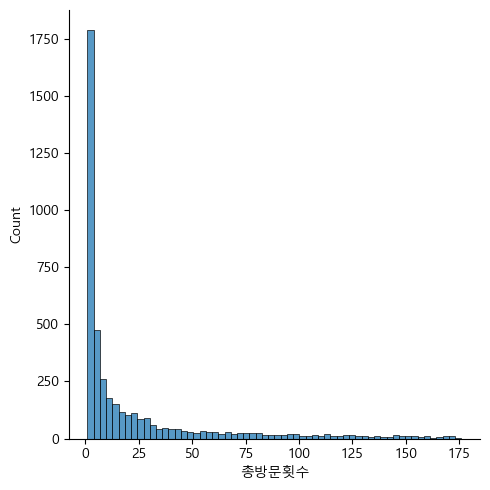

In [92]:
# 단일변수 시각화(연속형)
sns.displot(data=df2, x= '총방문횟수')
plt.savefig('image1.png') # image1.png 파일 이름으로 그래프를 저장

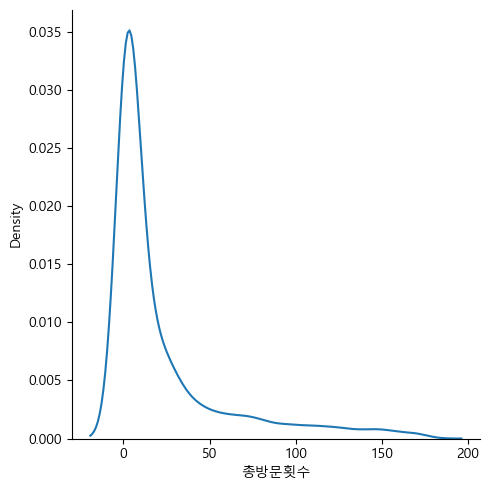

In [94]:
# 연속형 - 확률밀도함수 그래프 KDE
sns.displot(data=df2, x='총방문횟수', kind='kde')

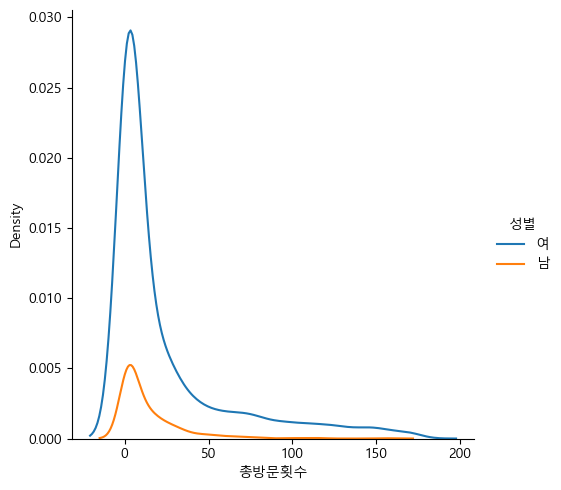

In [97]:
#그래프 중첩 -> hue = 
sns.displot(data=df2, x='총방문횟수', kind='kde', hue='성별')

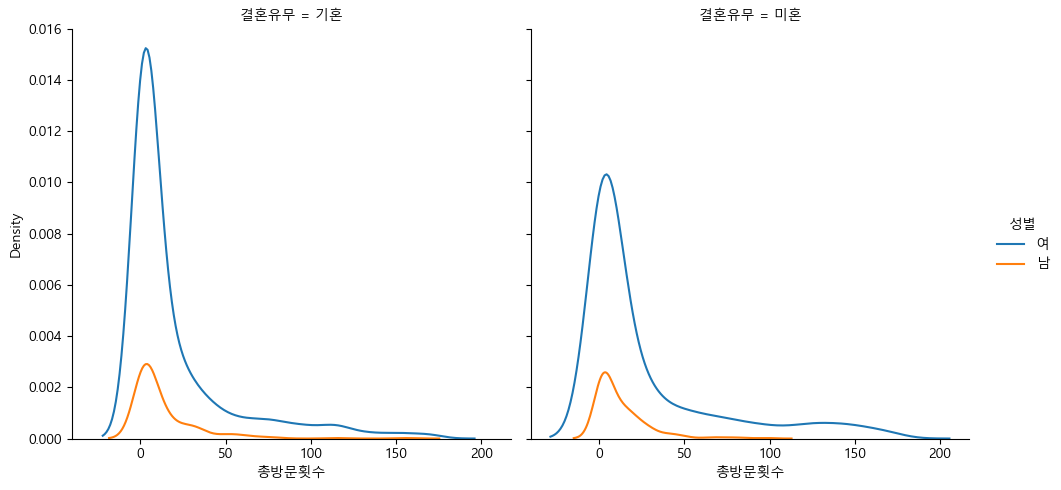

In [99]:
# 그래프 분할(subplot) -> col=
sns.displot(data=df2, x='총방문횟수', kind='kde', hue='성별',col='결혼유무')
